<a href="https://colab.research.google.com/github/Feliperojas2601/Lucipher/blob/main/DES/jrojasce_Lab6DES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 6 - DES  
Por: Felipe Rojas Cendales  
UNAL | Introducción a la criptografía y la seguridad de la información

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pydes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The key:  b'\x8eh:E\x02 \xb2\xe1'

Original image:


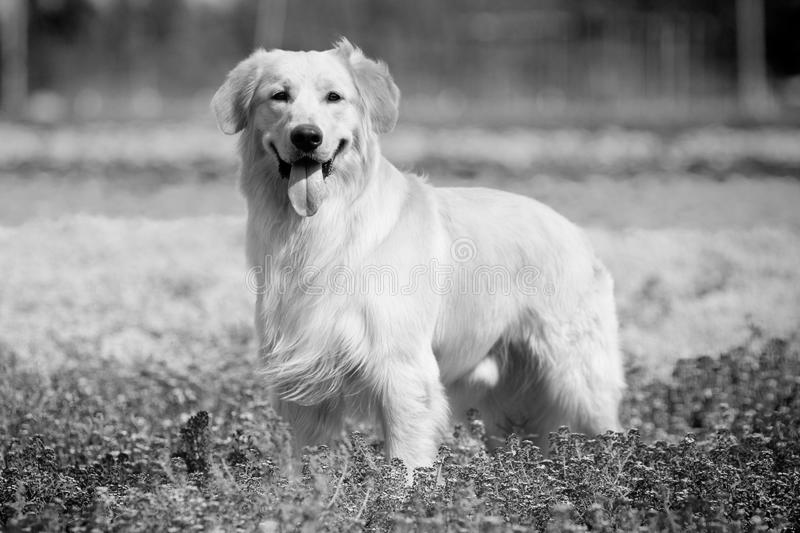


Encrypted image:  b'\xf6\xed\xa1\x89\xd6?\xedv\xca~\x10\xea\xed\xa3&\x1cS\x85\x1e\x80s\xaf\xf7=\xbdLs\x99\x91\xc8\xab\xad,n\x8b\x8eJ\x9aT\x88\xb0\x1b\x05\xe6\xdfm\x7f\xec\xeb\xf1\x01\xca6O\x91\xc6uBHL\x14\xbe3qEV\r\xc3\xcb*\x9cUJR3nzF\x0c\x83evL:^`\xe5AO\x18i!0\xe8R\xd1\xd7R\x8a\x07j\xf0]\x84\x99"\xb0\xd9\xf8\xf2^@\xda\xd2\xfc\xc1G}y\x7fu\xcfKq\xef\xdf\xc0\xc0\xc0\xf5\x91D\x99up\x1efB\xf7\x86\x95\xce\xc2)\xd2\xeb|f\x85*\xf5E\xb4\x03q\x95#\xea\xda\xb5g\xabDnP\xb7\xfeieih\x15\xb0\xec\xb4\xc9R\xd5"\x0e\x9c0\xb1Mw\x98\x80\x81\t"u+KL\xdf6\xb0\x8b\x80\xa5\xb0\x8b\xd2\xc2<8\xc1\x0c\x06~K_\xe8\xe3\x14\xaf\x08+I\xae\x80#\x05KM$<\xd4\xc6L<P\xcc\x07N\xbd:(\xe5\x975\xecM#\xae\xac\xde!\xaa\xa0k\xad\xcfx$\xf7\xd6\xa0H\x8e\xc4\xa93\xaf\xa8\xaf\xb44wu\xeac\x05I\xa5\xe4]I\xf1v\xea\x9b\x10\xb8\x97\xe3\xd5!\x8dp\xa0\x0b\xcf\xcd\x90\x8e@\xfd\xa3\xe5\x88n\xa9\xd4\x7f\x1e\t,\x01\x98B!i\x9f\xe1\x9b\x85\xee\xbaB\xbek\x8e\xc4\xd0N\xeb\x87\xe5\xdc`\xc7U\xa2\xa1|\xe7\x1d\x17\x15\xa2?\xb7\x8ew{\'\xbf\xea\xc8K\x1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


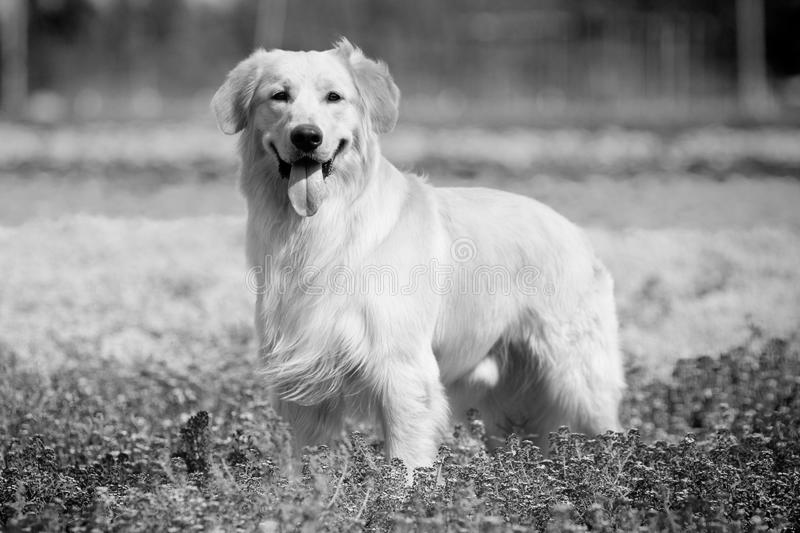

In [8]:
import numpy as np
import cv2
import pyDes
import os
import base64
from google.colab.patches import cv2_imshow

def encrypt(image, pyDesKey): 

  return pyDesKey.encrypt(image)

def decrypt(image, pyDesKey): 

  return pyDesKey.decrypt(image)

def des():

  # Generate key 8 bytes long
  key = bytes(os.urandom(8))
  print('The key: ', key)

  # Load image, print it and convert to gray scale
  originImage = cv2.imread('/content/drive/MyDrive/Noveno Semestre/Criptografía/Laboratorios/Lab6/dog.jpg')
  grayImage = cv2.cvtColor(originImage, cv2.COLOR_BGR2GRAY)
  height = grayImage.shape[0]
  width = grayImage.shape[1]
  print('\nOriginal image:')
  cv2_imshow(grayImage)

  # Intance pyDes
  pyDesKey = pyDes.des(key, pad = None, padmode = pyDes.PAD_PKCS5)

  # Encrypt image and show
  encryptedImage = encrypt(bytes(grayImage), pyDesKey)
  print('\nEncrypted image: ', encryptedImage) 

  # Base 64 
  encryptedImageEncodeBase64 = base64.b64encode(encryptedImage) 
  print('\nEncrypted image B64: ', encryptedImageEncodeBase64)
  encryptedImageDecodeBase64 = base64.b64decode(encryptedImageEncodeBase64)

  # Decrypt image and show 
  decryptedImage = decrypt(encryptedImageDecodeBase64, pyDesKey)
  decryptedProcessedImage = np.fromstring(decryptedImage, np.uint8).reshape(height, width)
  print('\nDecrypted image: ', decryptedImage)
  print('\nDecrypted Processed image: ') 
  cv2_imshow(decryptedProcessedImage)
  
des()
